# VADER Sentiment Scoring

In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
# Download the VADER lexicon if not already downloaded
nltk.download("vader_lexicon")

Here, I am using the Naive Bayes Model's results to perform sentiment analysis as i find them to be the most accurate.

In [7]:
data = pd.read_csv("C:/Users/user/Documents/Bayes/ARP/ARP Topic/Codes/Codes/Folgore_naive_bayes_predictions.csv", encoding='ISO-8859-1')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Author             47 non-null     object
 1   Date               47 non-null     object
 2   Comment            47 non-null     object
 3   Processed_comment  47 non-null     object
 4   predicted_age      47 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ KB


In [9]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [10]:
# Add new columns for original scores
data[['neg', 'neu', 'pos', 'compound']] = data['Comment'].apply(lambda x: pd.Series(sid.polarity_scores(x)))

In [11]:
# Define a function to categorize sentiment
def get_sentiment_category(score):
    if score > 0:
        return 1
    elif score < 0:
        return 0
    else:
        return 0

In [12]:
data['sentiment'] = data['Comment'].apply(lambda x: get_sentiment_category(sid.polarity_scores(x)['compound']))

In [14]:
# Filter out neutral comments
data_filtered = data[(data['sentiment'] == 1) | (data['sentiment'] == 0)]

In [15]:
data_filtered.to_csv("Folgore_Sentiment_Analysis_final.csv", index=False)

# Visualisations

In [16]:
# Group by predicted age and sentiment
grouped = data_filtered.groupby(['predicted_age', 'sentiment']).size().unstack()

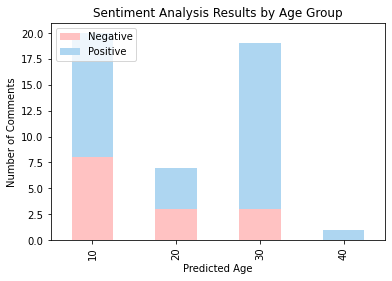

In [17]:
colors = ['#FFC2C2', '#AED6F1']

# Plot the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, color=colors)

# Add chart labels and title
plt.xlabel('Predicted Age')
plt.ylabel('Number of Comments')
plt.title('Sentiment Analysis Results by Age Group')

handles, labels = ax.get_legend_handles_labels()
labels = ['Negative', 'Positive']
plt.legend(handles, labels, loc='upper left')
plt.show()